<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:brown;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Iris Flower Classification
</p>
</div>

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

<b>Task 1 Objective:- Iris Flower Classification using Machine Learning<br>

<b>Description</b><br>

💡 Iris flower has three species; setosa, versicolor, and virginica, which differs according to their
measurements.<br>
💡 The measurements of the iris flowers according to their species are given in the dataset.<br>
💡 In this notebook we will train a machine learning model that can learn from the measurements of the iris species and classify them. 
💡 Dataset Link:- https://www.kaggle.com/datasets/saurabh00007/iriscsv

<a id="1.3"></a>
<h2 style="font-family: Verdana; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color:aliceblue;"><b> Author:- </b> Kumod Sharma</h2>
</div>

<center>
<img src="https://www.gardendesign.com/pictures/images/900x705Max/site_3/iris-sibirica-ruffled-velvet-iris-purple-flower-beardless-siberian-iris-alamy-stock-photo_12591.jpg" width=500 height=400 />
</center>

----

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Importing Libraries
</p>
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(style="darkgrid",font_scale=1.5)

from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Loading Datasets
</p>
</div>

In [2]:
df = pd.read_csv("C:\\Users\\kumod sharma\\Desktop\\Iris.csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


---

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Basic Understanding of Data
</p>
</div>

### 1. Checking Dimensions of the Data.

In [6]:
df.shape

(150, 6)

**Observation**
1. From the above output we can say that there is **150 rows/records** and **6 columns/Features** present in our dataset.

### 2. Checking the Data-Types of the Features.

In [9]:
df.dtypes.to_frame().rename(columns={0:"Data-Types"})

,Data-Types
Id,int64
SepalLengthCm,float64
SepalWidthCm,float64
PetalLengthCm,float64
PetalWidthCm,float64
Species,object


**Observation**
1. From above output we can observe that except the **species feature** all the features are having **numerical** data-types.
2. All the features are having correct data-types. So we don't have to do any changes.

### 3. Checking NaN values in our Dataset.

In [11]:
df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})

,Total No. of Missing Values
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


**Observation**
1. We can observe that **none of the features is having Missing values**.

### 4. Checking Duplicate Values.

In [13]:
df.duplicated().sum()

0

**Observation**
1. From the above output we can say that there is **no duplicate** records present in our dataset.

---

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Exploratory Data Analysis (EDA)
</p>
</div>

plot

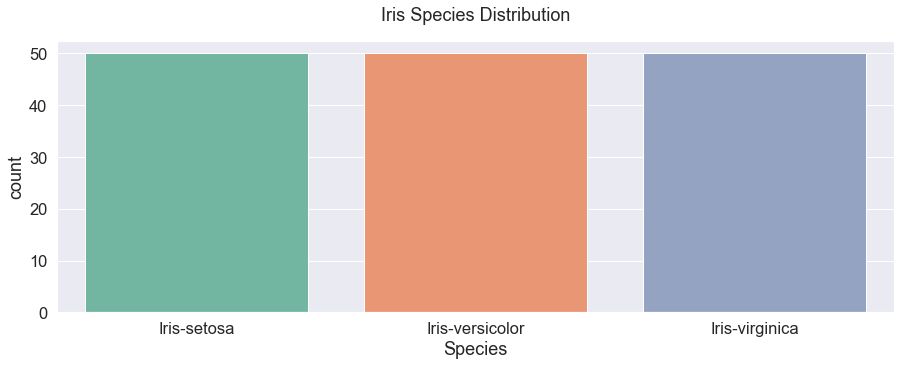

In [30]:
plt.figure(figsize=(15,5))
sns.countplot(df["Species"],data=df,palette="Set2")
plt.title("Iris Species Distribution",pad=20)
plt.show()

**Observation**
1. We can observe that all the species are having **equal records**.
2. So we can make a conclusion that our target is having **class-balanced**.
3. So we don't have to use techniques like **over_sampling or under_Sampling**.

---

### 2. Visualizing the "SepalLength" & "SepalWidth" Features w.r.t Species Feature.

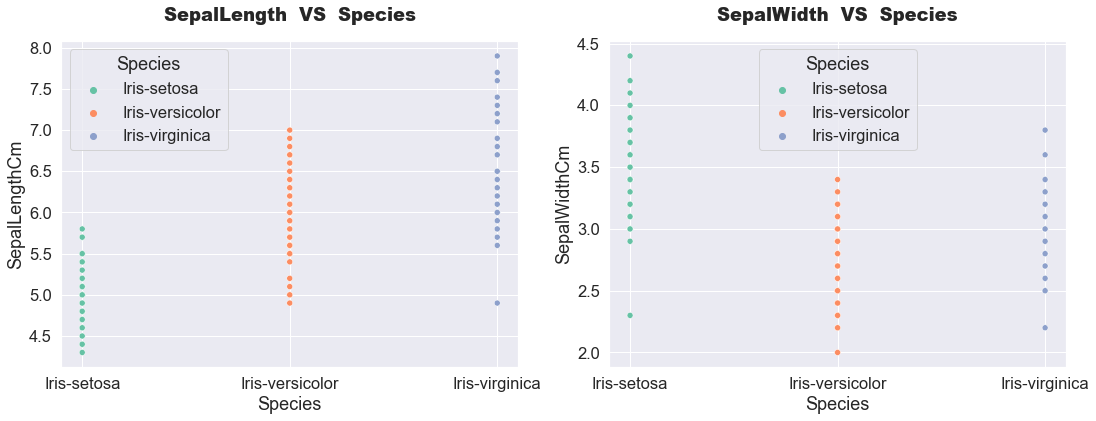

In [63]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.scatterplot("Species","SepalLengthCm",data=df,hue="Species",palette="Set2")
plt.title("SepalLength  VS  Species",pad=20,fontweight="black")
plt.subplot(1,2,2)
sns.scatterplot("Species","SepalWidthCm",data=df,hue="Species",palette="Set2")
plt.title("SepalWidth  VS  Species",pad=20,fontweight="black")
plt.show()

**Observation**
1. For **Iris-setosa** we can observe that this flower species are having **sepal length less than 6cm**  and **sepal width less than 5cm**. 
2. **Iris-setosa** is having the smallest **sepal length** among the three species but the **Sepal width** is argest among the three species.
3. For **Iris-versicolor** we can observe that the **sepal length is greater than 4.5cm but less than 7cm** and **sepal width less than 3.5cm**.
4. **Iris-versicolor** is having the smallest **sepal width**.
5. For **Iris-Virginica** we can observe that the **sepal length is more than 5cm** and **sepal width more than 2.5cm**.
5. **Iris-versicolor** is having the largest **sepal length**.

---

### 3. Visualizing "Petal Length" & "Petal Width" Feature w.r.t Species Feature.

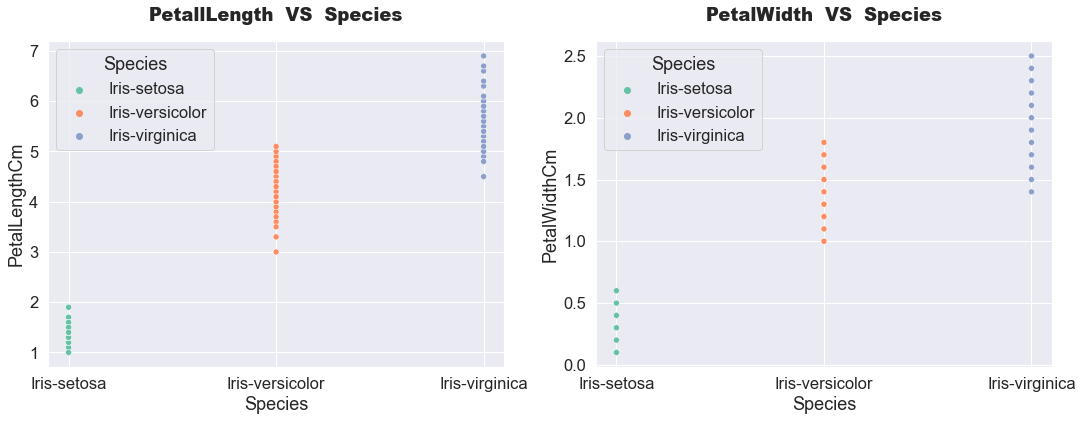

In [64]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.scatterplot("Species","PetalLengthCm",data=df,hue="Species",palette="Set2")
plt.title("PetallLength  VS  Species",pad=20,fontweight="black")
plt.subplot(1,2,2)
sns.scatterplot("Species","PetalWidthCm",data=df,hue="Species",palette="Set2")
plt.title("PetalWidth  VS  Species",pad=20,fontweight="black")
plt.show()

**Observation**
1. For **Iris-setosa** we can observe that this flower species are having **petal length less than 2cm**  and **Petal width less than 1cm**. 
2. **Iris-setosa** is having the smallest **Petal length** & **Petal Width** among the three species.
3. For **Iris-versicolor** we can observe that the **Petal length is greater than 3cm but less than 5.5cm** and **Petal width more than 1cm and less than 2cm**.
4. **Iris-versicolor** is having the almost avergae values for **Petal width** & **Petal Length**.
5. For **Iris-Virginica** we can observe that the **Petal length is more than 4cm** and **Petal width more than 1cm**.
5. **Iris-versicolor** is having the largest **Petal length** & **Petal Width**.

---

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Data Pre-Processing
</p>
</div>

### 1. Selecting Label & Target For Model Training.

In [73]:
x = df.drop(columns=["Species","Id"])
y = df["Species"]

### 2. Splitting Data For Model training & Tetsing.

In [74]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [75]:
print(x_train.shape,y_train.shape)

(120, 4) (120,)


In [76]:
print(x_test.shape,y_test.shape)

(30, 4) (30,)


---

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Model Building
</p>
</div>

### Logistic Regression Model.

In [77]:
clf = LogisticRegression()

In [78]:
clf.fit(x_train,y_train)

LogisticRegression()

### Model Prediction for Training & Testing Data.

In [82]:
train_pred = clf.predict(x_train)
test_pred = clf.predict(x_test)

### Checking Accuracy of Model Prediction.

In [87]:
print("Accuraacy on Training Data is: ",accuracy_score(y_train,train_pred)*100)

Accuraacy on Training Data is:  97.5


In [89]:
print("Accuracy on Tetsing Data is:",accuracy_score(y_test,test_pred)*100)

Accuracy on Tetsing Data is: 100.0


**Obseravtion**
1. We can clearly observe that we got an accuracy of **97 on training data** and **100 on testing data**.
2. So we can conclude that our model is having a kind of **best fitting.**

### Model Evaluation

In [91]:
cm = confusion_matrix(y_test,test_pred)
cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

### Visualizing The Confusion Matrix.

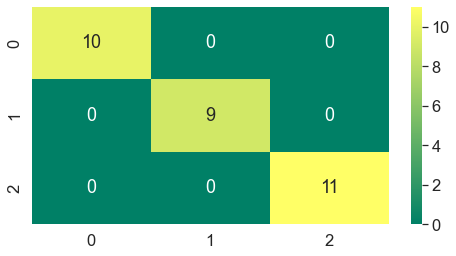

In [94]:
plt.figure(figsize=(8,4))
sns.heatmap(cm,annot=True,fmt="g",cmap="summer")
plt.show()

**Obseravtion**
1. We can clearly observe that our model has predicted all the values correctly.

---

<a id="1.1"></a>
<h2 style="font-family: Verdana; font-size: 28px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>Conclusion:-</b>
 </h2>

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

<b>Iris Flower Classification using Machine Learning</b><br>

<b>Key-Points</b><br>

💡 First we did <b>Data Preparation</b> and loaded all the libraries and datasets reuired for classifcation.<br>
💡 Then we performed <b>Exploratory Data Analysis</b> using different visualization techniques and generated some insights.<br>  
💡 Then we performed <b>Data Preprocessing</b> to make raw data suitable for model training.
💡 Then we performed <b>Model building</b> and trained our model using <b>Logistic Regression Algorithm.</b><br>
💡 Then we performed <b>Model Evaluation</b> and in the end we generated a model with accuracy of <b>100</b> on testing data.
</div>

---